# Geopandas 기초

Geopands와 Geoplot 등을 이용하여 기본적인 공간분석과 공간시각화를 진행해보겠습니다.

## 1. 준비

먼저, 경고메시지 및 출력 결과 처리와 관련된 라이브러리를 호출

In [2]:
import warnings
warnings.filterwarnings(action='ignore') #경고 메시지 무시
from IPython.display import display #print가 아닌 display()로 연속 출력
from IPython.display import HTML #출력 결과를 HTML로 생성

In [ ]:
공간데이터 처리와 관련된 Pandas, Geopandas 및 Fiona를 호출합니다.

In [3]:
import pandas as pd
import geopandas as gpd  # Import geopandas
import fiona #공간데이터를 딕셔너리 형태 등으로 접근할 수 있는 라이브러리 

## 2. 데이터 로딩 및 가공

CCTV CSV 데이터를 로딩합니다. usecols로 용량을 줄이고, dtype으로 데이터타입을 맞춰줍니다.

In [3]:
# CCTV CSV 로딩
df_cctv = pd.read_csv('./data/org/전국cctv표준데이터.csv', index_col=None, header=0, 
                 names=['admin', 'addr1', 'addr2', 'usetype', 'cnt', 'pixel', 'azimuth', 'keep', 'inst_date', 'tel', 'lat', 'lon', 'up_date', 'offer_cd', 'offer', 'id2'], 
                 usecols=['admin', 'addr1', 'lat', 'lon'], 
                 dtype={'admin':object, 'addr1':object, 'lat':float, 'lon':float},
                 encoding="EUC-KR"    )
df_cctv.head()

,admin,addr1,lat,lon
0,청도공영사업공사,경상북도 청도군 화양읍 남성현로 348,35.687293,128.724165
1,청도공영사업공사,경상북도 청도군 화양읍 남성현로 348,35.687293,128.724165
2,청도공영사업공사,경상북도 청도군 화양읍 남성현로 348,35.687293,128.724165
3,청도공영사업공사,경상북도 청도군 화양읍 남성현로 348,35.687293,128.724165
4,청도공영사업공사,경상북도 청도군 화양읍 남성현로 348,35.687293,128.724165


속성 조건으로 서울시 지역 데이터만 남깁니다.

In [4]:
# CCTV CSV 에서 서울시 데이터만 추출
df_cctv[['lat', 'lon']].dropna() #좌표값 없는 데이터 제거
df_cctv2 = df_cctv[df_cctv['addr1'].str.contains('서울특별시')==True]  
df_cctv2.head()

,admin,addr1,lat,lon
8089,서울특별시 송파구청,서울특별시 송파구 바람드리길 2,37.538288,127.115963
8090,서울특별시 송파구청,서울특별시 송파구 바람드리12길 14-1,37.536698,127.118098
8091,서울특별시 송파구청,서울특별시 송파구 천호대로 996,37.538177,127.122626
8092,서울특별시 송파구청,서울특별시 송파구 올림픽로57길 2,37.534559,127.121416
8093,서울특별시 송파구청,서울특별시 송파구 강동대로 76,37.526222,127.115766


가공된 데이터에 대한 기본 정보를 확인합니다.

In [5]:
# 추출한 CCTV의 기본정보 및 기초 통계 확인
df_cctv2.info()
#df_cctv2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24199 entries, 8089 to 160379
Data columns (total 4 columns):
admin    24199 non-null object
addr1    24199 non-null object
lat      24199 non-null float64
lon      24199 non-null float64
dtypes: float64(2), object(2)
memory usage: 945.3+ KB


가공된 데이터를 좌표를 이용하여 공간데이터프레임으로 변환합니다.

In [6]:
# 서울시 CCTV 공간데이터화
geom_cctv = gpd.points_from_xy(df_cctv2.lon, df_cctv2.lat)
geom_cctv[0:3]

geom_cctv는 도형정보만 있는 상태입니다.
아래에서 속성정보를 붙여주고, 좌표계도 정의된 gdf_cctv라는 공간데이터프레임이 됩니다.

In [7]:
# 좌표계 정의/변환용 라이브러리
import pyproj
from fiona.crs import from_epsg
coulumns = ['admin', 'addr1']
gdf_cctv = gpd.GeoDataFrame(df_cctv2[coulumns], geometry=geom_cctv, crs=from_epsg(4326))
#df_cctv_gdf.info()
gdf_cctv.head()

,admin,addr1,geometry
8089,서울특별시 송파구청,서울특별시 송파구 바람드리길 2,POINT (127.11596 37.53829)
8090,서울특별시 송파구청,서울특별시 송파구 바람드리12길 14-1,POINT (127.11810 37.53670)
8091,서울특별시 송파구청,서울특별시 송파구 천호대로 996,POINT (127.12263 37.53818)
8092,서울특별시 송파구청,서울특별시 송파구 올림픽로57길 2,POINT (127.12142 37.53456)
8093,서울특별시 송파구청,서울특별시 송파구 강동대로 76,POINT (127.11577 37.52622)


geopandas의 좌표계 변환 함수인 to_crs를 이용하여 epsg:3857로 변환합니다.

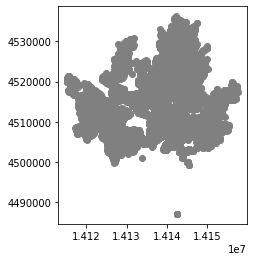

In [8]:
gdf_cctv2 = gdf_cctv.to_crs(epsg=3857)  #좌표계를 epsg 3857로 변환
gdf_cctv2.plot(color='gray')

속성 조건으로 강남구 지역으로 한번 더 데이터 범위를 좁혔습니다. 

In [9]:
#강남구 CCTV만 한번 더 추출
gdf_cctv3 = gdf_cctv2[gdf_cctv2['admin'].isin(['서울특별시 강남구청'])]
gdf_cctv3.head()

,admin,addr1,geometry
77730,서울특별시 강남구청,서울특별시 강남구 헌릉로622길 27,POINT (14149469.061 4503815.578)
77731,서울특별시 강남구청,서울특별시 강남구 밤고개로36길 6,POINT (14149520.035 4503868.001)
77732,서울특별시 강남구청,서울특별시 강남구 밤고개로34길 23 (세곡동),POINT (14149363.620 4503920.608)
77733,서울특별시 강남구청,"서울특별시 강남구 헌릉로590길 11 (세곡동, 리엔파크3단지)",POINT (14149203.687 4503934.114)
77734,서울특별시 강남구청,"서울특별시 강남구 헌릉로590길 11 (세곡동, 리엔파크3단지)",POINT (14149203.687 4503934.114)


출력하여 공간적 범위를 벗어나는 이상치가 없는지 확인해봅니다.

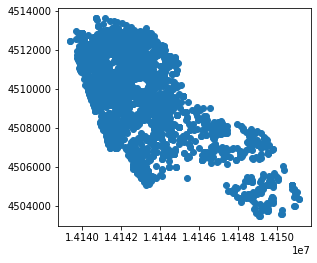

In [10]:
gdf_cctv3.plot()

가공된 강남구 CCTV 공간데이터를 geojson 파일로 저장해둡니다.

In [11]:
#CCTV 공간데이터를 geojson으로 저장
gdf_cctv2.to_file('./data/python/cctv.geojson', driver='GeoJSON')
gdf_cctv3.to_file('./data/python/cctv_gn.geojson', driver='GeoJSON')

이번에는 도서관 데이터를 로딩합니다.

In [12]:
#도서관 csv 로딩
df_library = pd.read_csv('./data/org/전국도서관표준데이터.csv', index_col=None, header=0, 
                 names=['name', 'do', 'gu', 'type', 'offday', 'time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'seat', 'datacnt1', 'datacnt2', 'datacnt3', 'rent1', 'rentdat', 'addr', 'admin', 'tel', 'land_area', 'bd_area', 'url', 'lat', 'lon', 'update', 'offer_cd', 'offer', 'blank'], 
                 usecols=['name', 'do', 'gu', 'lat', 'lon'], 
                 dtype={'name':object, 'do':object, 'gu':object, 'lat':float, 'lon':float},
                 encoding="EUC-KR"    )
df_library.head()

,name,do,gu,lat,lon
0,옥과공공도서관,전라남도,곡성군,35.274540,127.13557
1,도봉어린이문화정보도서관(디지털자료실),서울특별시,서울특별시 도봉구,37.659007,127.04947
2,"도봉어린이문화정보센터(자료열람실, 잉글리시 아일랜드)",서울특별시,서울특별시 도봉구,37.659007,127.04947
3,학마을도서관 (종합자료실),서울특별시,서울특별시 도봉구,37.662108,127.02782
4,학마을도서관 (어린이 자료실),서울특별시,서울특별시 도봉구,37.662110,127.02782


In [13]:
# 도서관 CSV 에서 서울시 데이터만 추출
df_library[['lat', 'lon']].dropna() #좌표값 없는 데이터 제거
df_library2 = df_library[df_library['do'] == '서울특별시']  #시도 항목 값이 서울인 것만 추출
df_library2.head()

,name,do,gu,lat,lon
1,도봉어린이문화정보도서관(디지털자료실),서울특별시,서울특별시 도봉구,37.659007,127.04947
2,"도봉어린이문화정보센터(자료열람실, 잉글리시 아일랜드)",서울특별시,서울특별시 도봉구,37.659007,127.04947
3,학마을도서관 (종합자료실),서울특별시,서울특별시 도봉구,37.662108,127.02782
4,학마을도서관 (어린이 자료실),서울특별시,서울특별시 도봉구,37.662110,127.02782
5,방학동영유아플라자,서울특별시,서울특별시 도봉구,37.663230,127.03033


In [14]:
# 추출한 도서관 기본정보 및 기초 통계 확인
df_library2.info()
#df_library2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 1 to 3192
Data columns (total 5 columns):
name    508 non-null object
do      508 non-null object
gu      508 non-null object
lat     506 non-null float64
lon     506 non-null float64
dtypes: float64(2), object(3)
memory usage: 23.8+ KB


In [15]:
# 서울시 도서관 공간데이터화
geom_lib = gpd.points_from_xy(df_library2.lon, df_library2.lat)
geom_lib[0:3]

In [16]:
coulumns = ['name', 'gu']
gdf_library = gpd.GeoDataFrame(df_library2[coulumns], geometry=geom_lib, crs=from_epsg(4326))
#df_library_gdf.info()
gdf_library.head()

,name,gu,geometry
1,도봉어린이문화정보도서관(디지털자료실),서울특별시 도봉구,POINT (127.04947 37.65901)
2,"도봉어린이문화정보센터(자료열람실, 잉글리시 아일랜드)",서울특별시 도봉구,POINT (127.04947 37.65901)
3,학마을도서관 (종합자료실),서울특별시 도봉구,POINT (127.02782 37.66211)
4,학마을도서관 (어린이 자료실),서울특별시 도봉구,POINT (127.02782 37.66211)
5,방학동영유아플라자,서울특별시 도봉구,POINT (127.03033 37.66323)


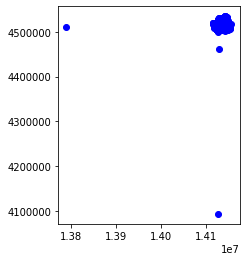

In [17]:
gdf_library2 = gdf_library.to_crs(epsg=3857)  #좌표계를 3857로 변환
gdf_library2.plot(color='blue')

도서관의 경우 속성조건으로 추출시 공간적인 이상치가 있는 것이 보입니다.
행정구역 데이터를 이용하여 공간적으로 이상치를 제거해보겠습니다.

In [18]:
#좌표 범위를 벗어나는 데이터를 제외하기 위해 행정구역 공간데이터 로딩
gdf_admin_gu_pg = gpd.read_file('./data/org/SIG_201905/TL_SCCO_SIG.shp', encoding='euc-kr')  
#euc-kr, euckr, utf-8, cp949 중 선택
gdf_admin_gu_pg.crs 

{'proj': 'tmerc',
 'lat_0': 38,
 'lon_0': 127.5,
 'k': 0.9996,
 'x_0': 1000000,
 'y_0': 2000000,
 'ellps': 'GRS80',
 'units': 'm',
 'no_defs': True}

내용상으로는 epsg 5179이나 정확하게 EPSG 코드로 인식되지는 않는 상태입니다. 정의해보겠습니다.

In [19]:
gdf_admin_gu_pg.crs = "epsg:5179"
gdf_admin_gu_pg.crs

'epsg:5179'

In [20]:
gdf_admin_gu_pg2 = gdf_admin_gu_pg.to_crs(epsg=3857)  #좌표계를 3857로 변환
gdf_admin_gu_pg2.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((14138537.494 4520328.400, 14138545.2..."
1,11140,Jung-gu,중구,"POLYGON ((14140150.910 4519133.456, 14140175.5..."
2,11170,Yongsan-gu,용산구,"POLYGON ((14134144.847 4516844.609, 14134143.5..."
3,11200,Seongdong-gu,성동구,"POLYGON ((14142408.062 4519186.313, 14142611.9..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((14148892.618 4519195.233, 14148956.4..."


시군구 코드로 속성 추출을 하기 위해 시군구 코드를 문자열 타입으로 바꾸겠습니다.

In [21]:
gdf_admin_gu_pg2['SIG_CD'] = gdf_admin_gu_pg2['SIG_CD'].astype(str)

확인차 시군구 데이터를 출력해봅니다.

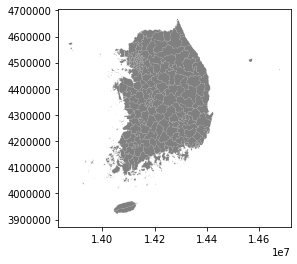

In [22]:
gdf_admin_gu_pg2.plot(color='grey')

시군구코드에서 앞 2자리만 뽑아 DO 항목에 넣고, 이 중에서 '11' 즉, 서울시 행정구역만 추출합니다.

In [23]:
#서울지역 행정구역만 추출
gdf_admin_gu_pg2['DO'] = gdf_admin_gu_pg2['SIG_CD'].str.slice(start=0, stop=2) 
gdf_admin_gu_pg3 = gdf_admin_gu_pg2[gdf_admin_gu_pg2['DO'].str.contains('11')==True]  
gdf_admin_gu_pg3.info()
gdf_admin_gu_pg3.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 5 columns):
SIG_CD        25 non-null object
SIG_ENG_NM    25 non-null object
SIG_KOR_NM    25 non-null object
geometry      25 non-null geometry
DO            25 non-null object
dtypes: geometry(1), object(4)
memory usage: 1.2+ KB


,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,DO
0,11110,Jongno-gu,종로구,"POLYGON ((14138537.494 4520328.400, 14138545.2...",11
1,11140,Jung-gu,중구,"POLYGON ((14140150.910 4519133.456, 14140175.5...",11
2,11170,Yongsan-gu,용산구,"POLYGON ((14134144.847 4516844.609, 14134143.5...",11
3,11200,Seongdong-gu,성동구,"POLYGON ((14142408.062 4519186.313, 14142611.9...",11
4,11215,Gwangjin-gu,광진구,"POLYGON ((14148892.618 4519195.233, 14148956.4...",11


데이터 건수와 지도 출력으로 확인합니다.

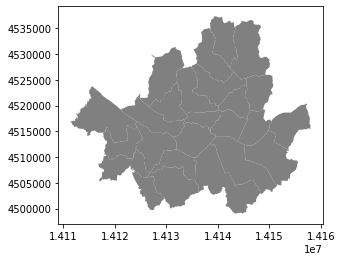

In [24]:
gdf_admin_gu_pg3.plot(color='grey')

서울시 구별 행정구역에 더미 항목을 만들어서 Dissolve하여 서울시 경계를 만들고,  
이 안에 들어오는(within) 도서관 데이터만 추출하겠습니다.

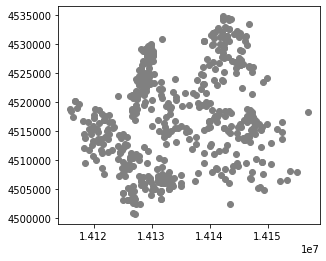

In [25]:
#서울시 안에 있는 도서관만 공간 선택
gdf_admin_gu_pg3['dummy'] = 'dummy'  #서울시 구별 폴리곤에 더미 컬럼 추가
geom = gdf_admin_gu_pg3.dissolve(by='dummy').geometry[0]  # '더미'값으로 디졸브한 서울시 영역
gdf_library3 = gdf_library2[gdf_library2.within(geom)] #서울시 영역 내 도서관 포인트 선택
gdf_library3.plot(color='grey')

In [26]:
gdf_library3.head()

,name,gu,geometry
1,도봉어린이문화정보도서관(디지털자료실),서울특별시 도봉구,POINT (14143082.295 4531366.330)
2,"도봉어린이문화정보센터(자료열람실, 잉글리시 아일랜드)",서울특별시 도봉구,POINT (14143082.295 4531366.330)
3,학마을도서관 (종합자료실),서울특별시 도봉구,POINT (14140672.206 4531802.330)
4,학마을도서관 (어린이 자료실),서울특별시 도봉구,POINT (14140672.239 4531802.640)
5,방학동영유아플라자,서울특별시 도봉구,POINT (14140951.651 4531960.136)


속성값을 이용하여 강남구 데이터로 한번 더 범위를 좁히겠습니다.

In [27]:
#강남구 도서관만 한번 더 추출
gdf_library4 = gdf_library3[gdf_library3['gu'].str.contains('강남구')==True] 
gdf_library4.head()

,name,gu,geometry
1433,세곡도서관,강남구,POINT (14149476.666 4504689.474)
1434,대치1작은도서관,강남구,POINT (14143895.486 4508083.707)
1435,역삼2동작은도서관,강남구,POINT (14142749.159 4508454.990)
1436,신사동작은도서관,강남구,POINT (14140113.094 4512395.879)
1437,압구정동작은도서관,강남구,POINT (14140297.559 4512790.410)


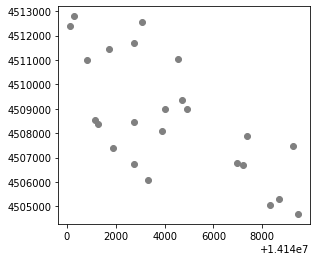

In [28]:
gdf_library4.plot(color='grey')

가공된 강남구 도서관 데이터를 파일로 저장합니다. 원 데이터가 크거나 가공 과정이 오래 걸리는 경우에는 필요한 과정입니다.

In [29]:
#도서관 공간데이터를 geojson으로 저장
gdf_library3.to_file('./data/python/library.geojson', driver='GeoJSON')
gdf_library4.to_file('./data/python/library_gn.geojson', driver='GeoJSON')

이번에는 보안등 데이터를 로딩합니다.

In [30]:
# 보안등 csv 로딩
df_slight = pd.read_csv('./data/org/전국보안등정보표준데이터.csv', index_col=None, header=0, 
                 names=['slight_id', 'cnt', 'addr1', 'addr2', 'lat', 'lon', 'inst_year', 'inst_ty', 'tel', 'admin', 'up_date', 'offer_cd', 'offer', 'blank'], 
                 usecols=['slight_id', 'lat', 'lon', 'inst_year', 'offer'], 
                 dtype={'slight_id':object, 'lat':float, 'lon':float, 'inst_year':object, 'offer':object, },
                 encoding="EUC-KR"    )
df_slight.head()

,slight_id,lat,lon,inst_year,offer
0,11-14-10,37.633862,127.042875,2007,서울특별시 도봉구
1,11-17-47,37.633861,127.041317,2013,서울특별시 도봉구
2,11-16-01,37.633853,127.040014,2013,서울특별시 도봉구
3,11-17-10,37.633847,127.039282,2007,서울특별시 도봉구
4,11-14-09,37.633821,127.042452,2008,서울특별시 도봉구


In [31]:
len(df_slight)

1590819

In [32]:
# 보안등 CSV 에서 서울시 데이터만 추출
df_slight[['lat', 'lon']].dropna() #좌표값 없는 데이터 제거
df_slight2 = df_slight[df_slight['offer'].str.contains('서울특별시 강남구')==True]  #서울인 것만 추출
df_slight2.head()

,slight_id,lat,lon,inst_year,offer
35953,개포동660-37,37.480474,127.062079,NaN,서울특별시 강남구
35954,개포동660-37,37.480474,127.062079,NaN,서울특별시 강남구
35955,개포동660-37,37.480474,127.062079,NaN,서울특별시 강남구
35956,개포동660-37,37.480474,127.062079,NaN,서울특별시 강남구
35957,개포동660-37,37.480474,127.062079,NaN,서울특별시 강남구


데이터 건수만 확인할 때 가장 가벼운 방식입니다. len < shape < info < describe

In [33]:
len(df_slight2)

11498

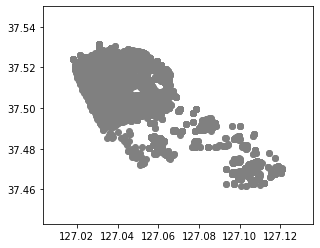

In [34]:
# 강남구 보안등 공간데이터화
geom_slight = gpd.points_from_xy(df_slight2.lon, df_slight2.lat)
coulumns = ['slight_id', 'inst_year']
gdf_slight = gpd.GeoDataFrame(df_slight2[coulumns], geometry=geom_slight, crs=from_epsg(4326))
gdf_slight.plot(color='grey')

In [35]:
gdf_slight2 = gdf_slight.to_crs(epsg=3857)  #좌표계를 3857로 변환
# 강남구 보안등 공간데이터를 geojson으로 저장
gdf_slight2.to_file('./data/python/slight.geojson', driver='GeoJSON')

## 3. 단계구분도 공간시각화 (Choropleth Map)

이제 로딩했던 서울시 구별 행정구역 공간데이터에 속성데이터를 조인해서 단계구분도를 만들어보겠습니다.
먼저, 구별 학령인구 데이터를 로딩하겠습니다. CSV와 XLS가 제공되는데 헤더 구조 등이 복잡해서 엑셀을 로딩했습니다.

In [36]:
#학령인구 로딩
df_spop = pd.read_excel('./data/org/sl_teen_pop2018.xls', sheet_name = 'Sheet1', 
                        index_col=None, header=2, 
                        names=['year', 'gu', 'sum', 'year9_cnt', 'year9_ratio', 'year0_cnt', 'year0_ratio', 'spop_cnt', 'spop_ratio' ], 
                 dtype={'gu':object, 'spop_ratio':float},
                 encoding="utf-8"    )
df_spop.head()

,year,gu,sum,year9_cnt,year9_ratio,year0_cnt,year0_ratio,spop_cnt,spop_ratio
0,2018,종로구,153065,24475,16.0,19179,12.5,20289,13.3
1,2018,중구,125725,16223,12.9,14145,11.3,13310,10.6
2,2018,용산구,228999,32494,14.2,29557,12.9,28164,12.3
3,2018,성동구,308221,46054,14.9,42774,13.9,38939,12.6
4,2018,광진구,355559,58208,16.4,48510,13.6,48143,13.5


In [37]:
df_spop.drop(['year', 'sum', 'year9_cnt', 'year9_ratio', 'year0_cnt', 'year0_ratio', 'spop_cnt'], axis=1, inplace=True) #불필요한 컬럼 삭제
df_spop.head()

,gu,spop_ratio
0,종로구,13.3
1,중구,10.6
2,용산구,12.3
3,성동구,12.6
4,광진구,13.5


다음에는 범죄통계 정보를 로딩하겠습니다. 

In [38]:
# 범죄통계 정보 로딩
df_crime = pd.read_excel('./data/org/sl_crime_2018.xls', sheet_name = 'Sheet1', 
                        index_col=None, header=2, 
                        names=['year', 'gu', 'crime_sum', 'etc1', 'etc2', 'etc3', 'etc4', 'etc5', 'etc6', 'etc7', 'etc8', 'etc9', 'etc10', 'etc11' ], 
                 dtype={'gu':object, 'crime_sum':int},
                 encoding="utf-8"    )
df_crime.head()

,year,gu,crime_sum,etc1,etc2,etc3,etc4,etc5,etc6,etc7,etc8,etc9,etc10,etc11
0,2018,종로구,3690,3913,6,7,3,7,236,1100,1483,969,1962,1830
1,2018,중구,4030,2679,2,2,11,11,207,115,1855,832,1955,1719
2,2018,용산구,3411,2543,1,1,3,2,331,285,1096,522,1980,1733
3,2018,성동구,2457,1787,2,2,5,8,126,102,999,487,1325,1188
4,2018,광진구,3915,2789,7,5,2,1,229,184,1769,974,1908,1625


In [39]:
df_crime.drop(['year', 'etc1', 'etc2', 'etc3', 'etc4', 'etc5', 'etc6', 'etc7', 'etc8', 'etc9', 'etc10', 'etc11'], axis=1, inplace=True) #불필요한 컬럼 삭제
df_crime.head()

,gu,crime_sum
0,종로구,3690
1,중구,4030
2,용산구,3411
3,성동구,2457
4,광진구,3915


이제 서울시 구별 행정구역 공간데이터프레임에 학령인구 정보를 구명 정보를 이용하여 속성조인합니다.

In [40]:
# 시군구 행정구역에 학령인구 속성 조인
gdf_gu = pd.merge(gdf_admin_gu_pg3, df_spop, how='left', left_on='SIG_KOR_NM', right_on='gu')
gdf_gu.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,DO,dummy,gu,spop_ratio
0,11110,Jongno-gu,종로구,"POLYGON ((14138537.494 4520328.400, 14138545.2...",11,dummy,종로구,13.3
1,11140,Jung-gu,중구,"POLYGON ((14140150.910 4519133.456, 14140175.5...",11,dummy,중구,10.6
2,11170,Yongsan-gu,용산구,"POLYGON ((14134144.847 4516844.609, 14134143.5...",11,dummy,용산구,12.3
3,11200,Seongdong-gu,성동구,"POLYGON ((14142408.062 4519186.313, 14142611.9...",11,dummy,성동구,12.6
4,11215,Gwangjin-gu,광진구,"POLYGON ((14148892.618 4519195.233, 14148956.4...",11,dummy,광진구,13.5


이번에는 위의 공간데이터프레임에 범죄통계 정보를 같은 방식으로 속성조인합니다.

In [41]:
# 시군구 행정구역에 범죄 통계 속성 조인
gdf_gu2 = pd.merge(gdf_gu, df_crime, how='left', left_on='SIG_KOR_NM', right_on='gu')
gdf_gu2.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,DO,dummy,gu_x,spop_ratio,gu_y,crime_sum
0,11110,Jongno-gu,종로구,"POLYGON ((14138537.494 4520328.400, 14138545.2...",11,dummy,종로구,13.3,종로구,3690
1,11140,Jung-gu,중구,"POLYGON ((14140150.910 4519133.456, 14140175.5...",11,dummy,중구,10.6,중구,4030
2,11170,Yongsan-gu,용산구,"POLYGON ((14134144.847 4516844.609, 14134143.5...",11,dummy,용산구,12.3,용산구,3411
3,11200,Seongdong-gu,성동구,"POLYGON ((14142408.062 4519186.313, 14142611.9...",11,dummy,성동구,12.6,성동구,2457
4,11215,Gwangjin-gu,광진구,"POLYGON ((14148892.618 4519195.233, 14148956.4...",11,dummy,광진구,13.5,광진구,3915


구별 범죄건수를 범죄율 정보로 바꾸겠습니다.

In [42]:
columns2=['DO', 'SIG_CD', 'SIG_KOR_NM',  'spop_ratio', 'crime_sum' ]
gdf_gu3 = gpd.GeoDataFrame(gdf_gu2[columns2], geometry=gdf_gu2.geometry, crs=from_epsg(3857))

crime_sum2 = gdf_gu3['crime_sum'].sum(axis=0) #서울시 전체 범죄 발생건수 합계
print(crime_sum2)

gdf_gu3['crime_ratio'] = round(gdf_gu3['crime_sum'] / crime_sum2 * 100, 1) #소수 첫째자리 범죄율 산출
gdf_gu3.head()

101948


,DO,SIG_CD,SIG_KOR_NM,spop_ratio,crime_sum,geometry,crime_ratio
0,11,11110,종로구,13.3,3690,"POLYGON ((14138537.494 4520328.400, 14138545.2...",3.6
1,11,11140,중구,10.6,4030,"POLYGON ((14140150.910 4519133.456, 14140175.5...",4.0
2,11,11170,용산구,12.3,3411,"POLYGON ((14134144.847 4516844.609, 14134143.5...",3.3
3,11,11200,성동구,12.6,2457,"POLYGON ((14142408.062 4519186.313, 14142611.9...",2.4
4,11,11215,광진구,13.5,3915,"POLYGON ((14148892.618 4519195.233, 14148956.4...",3.8


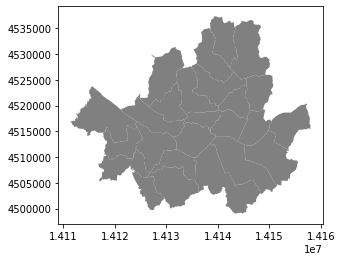

In [43]:
gdf_gu3.plot(color='grey')

시각화를 위한 Matplotlib 라이브러리 및 이와 관련된 설정을 합니다.

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
mpl.rc('font', family='NanumGothic') #한글 폰트 적용시
plt.rcParams["figure.figsize"] = (20,10) #차트 사이즈

이제 서울시의 구별 학령인구 단계구분도를 시각화해보겠습니다.

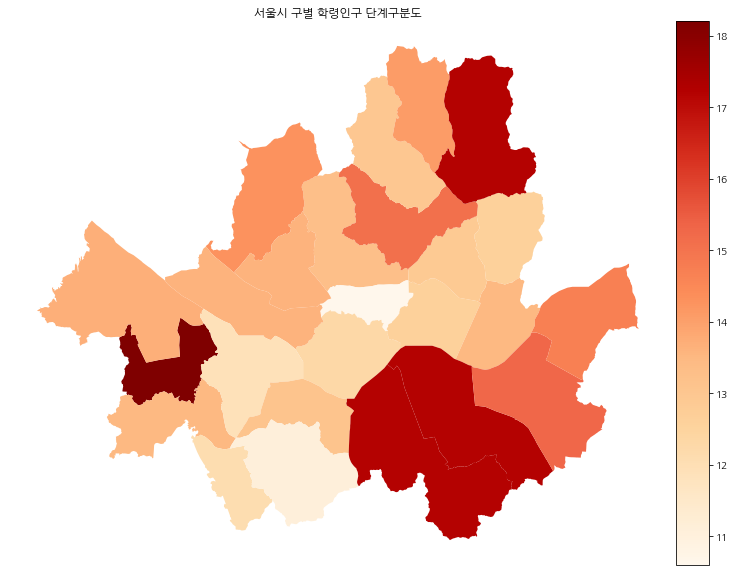

In [45]:
# 서울시 시군구 학령인구 단계구분도(Chropleth Map) 시각화
fig, ax = plt.subplots(1, 1)
# 범례
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# 시각화
column = 'spop_ratio'
gdf_gu3.plot(column, ax=ax, legend=True, cax=cax, cmap='OrRd')

ax.set_title("서울시 구별 학령인구 단계구분도")
ax.set_axis_off()
plt.show()

양천구, 서초구, 강남구, 노원구가 많은 것을 알 수 있습니다. 범죄율도 시각화해보겠습니다.

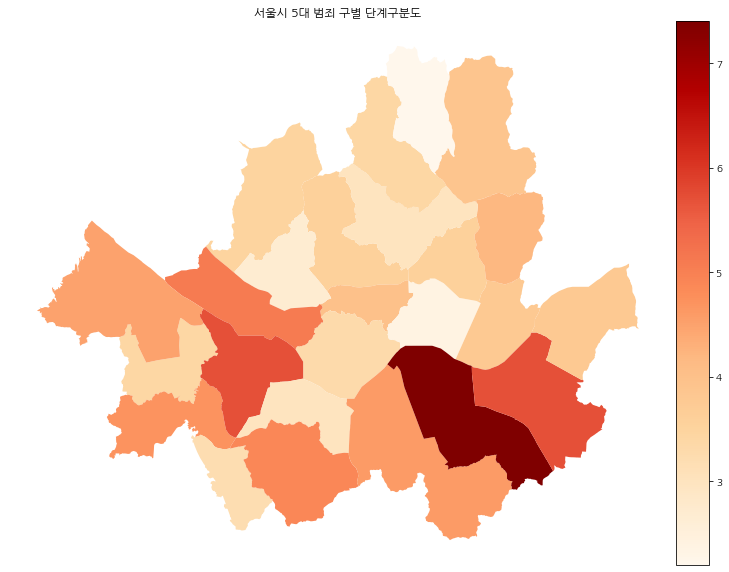

In [46]:
# 서울시 시군구 5대 범죄 발생률 단계구분도(Chropleth Map) 시각화
fig, ax = plt.subplots(1, 1)
# 범례
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# 시각화
column = 'crime_ratio'
gdf_gu3.plot(column, ax=ax, legend=True, cax=cax, cmap='OrRd')

ax.set_title("서울시 5대 범죄 구별 단계구분도")
ax.set_axis_off()
plt.show()

In [47]:
gdf_gu3.crs

{'init': 'epsg:3857', 'no_defs': True}

이번에는 geoplot이라는 라이브러리를 이용하여 공간시각화를 해보겠습니다. 이를 위해 공간데이터프레임을 epsg:4326으로 변환하겠습니다. 배경맵을 적용할 때에는 4326 또는 3857(Web Mercator)로 맞추는 것이 좋습니다.

In [48]:
gdf_gu4326 = gdf_gu3.to_crs(epsg=4326)  #좌표계를 4326으로 변환

centroid 공간함수는 중심점을 생성해주는 역할을 합니다.

In [49]:
# 서울시 구별 5대 범죄 폴리곤을 중심점 포인트로 변환
gdf_gu_pt = gdf_gu4326.copy() # copy GeoDataFrame
gdf_gu_pt['geometry'] = gdf_gu_pt['geometry'].centroid  # change geometry 
gdf_gu_pt.head()

,DO,SIG_CD,SIG_KOR_NM,spop_ratio,crime_sum,geometry,crime_ratio
0,11,11110,종로구,13.3,3690,POINT (126.97732 37.59492),3.6
1,11,11140,중구,10.6,4030,POINT (126.99597 37.56014),4.0
2,11,11170,용산구,12.3,3411,POINT (126.97991 37.53139),3.3
3,11,11200,성동구,12.6,2457,POINT (127.04106 37.55103),2.4
4,11,11215,광진구,13.5,3915,POINT (127.08575 37.54671),3.8


범죄율을 polyplot으로는 원의 크기로, pointplot으로는 심볼의 색상 단계로 표현해보겠습니다.

Text(0.5, 1.0, '2018년 서울시 5대 범죄 구별 버블맵')

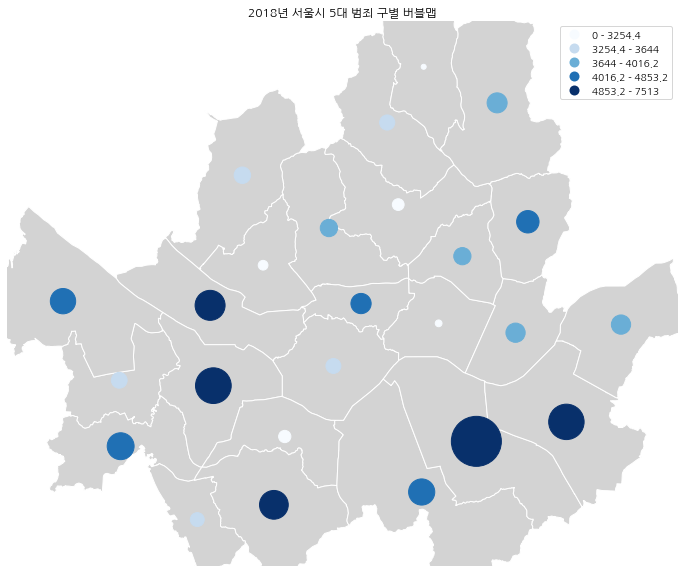

In [50]:
# 서울시 5대 범죄 버블맵
import geoplot as gplt #conda install -c conda-forge geoplot
import geoplot.crs as gcrs
import mapclassify as mc
plt.rcParams["figure.figsize"] = (15,15)

scheme = mc.Quantiles(gdf_gu_pt['crime_sum'], k=5)
proj = gcrs.WebMercator()

ax = gplt.polyplot(gdf_gu4326, zorder=-1, linewidth=1, projection=proj, edgecolor='white',
    facecolor='lightgray', figsize=(12, 12) )

gplt.pointplot(gdf_gu_pt, projection=gcrs.WebMercator(), 
               scale='crime_sum', limits=(5, 50), hue='crime_sum', scheme=scheme, cmap='Blues', 
               legend=True, legend_var='hue', ax=ax)

plt.title("2018년 서울시 5대 범죄 구별 버블맵")

같은 공간시각화에 배경맵을 함께 표현해보겠습니다. 범죄율은 강남구가 가장 높은 것을 알 수 있습니다. 
따라서, 강남구를 분석 대상으로 좁혀 보겠습니다.

In [7]:
import geoplot as gplt #conda install -c conda-forge geoplot
import geoplot.crs as gcrs
import mapclassify as mc

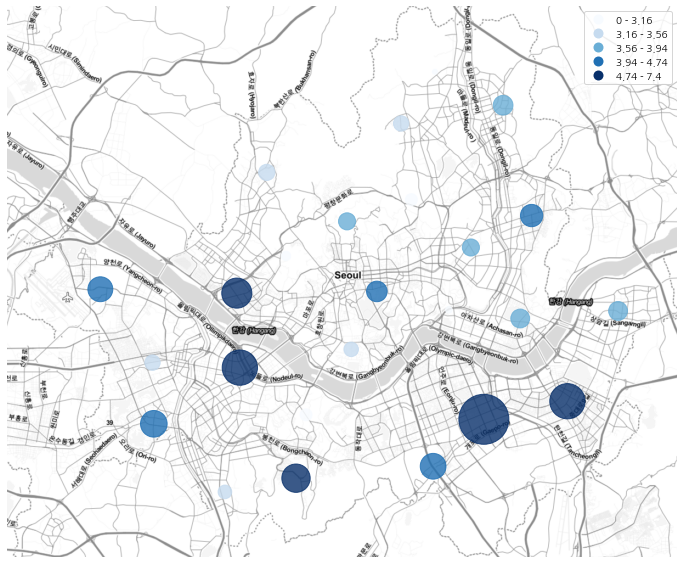

In [51]:
# 서울시 5대 범죄 버블맵 2
scheme = mc.Quantiles(gdf_gu_pt['crime_ratio'], k=5) #분위수 방식 단계 구분
extent = gdf_gu4326.total_bounds

ax = gplt.pointplot(gdf_gu_pt, projection=gcrs.WebMercator(), alpha=0.8,
    scale='crime_ratio', limits=(5, 50), hue='crime_ratio', scheme=scheme, cmap='Blues', 
    legend=True, legend_var='hue', figsize=(12, 12))

gplt.webmap(gdf_gu4326, ax=ax, extent=extent, provider='ST_TONER_LITE')

## Geoplot의 kdeplot을 이용한 공간밀도 시각화

KDE(커널밀도추정) 알고리즘에 기반한 kdeplot 기능을 이용하여 CCTV가 밀집한 지역을 시각화해보겠습니다. 

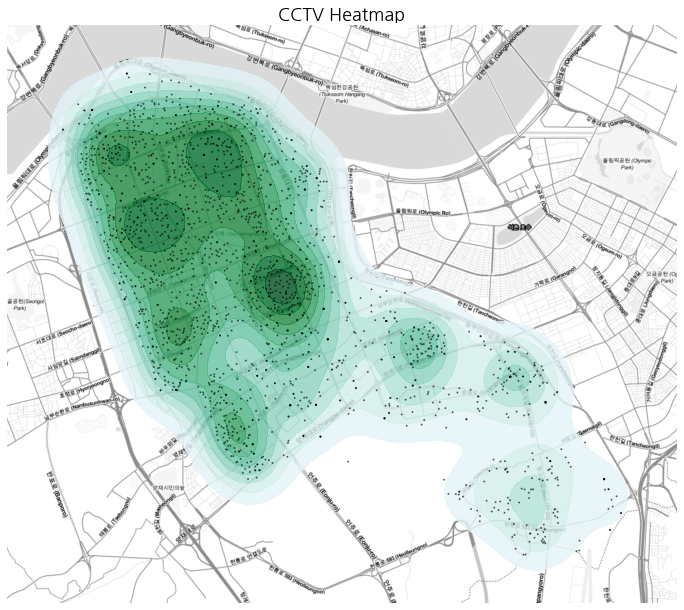

In [52]:
# CCTC 히트맵
gdf_cctv4326 = gdf_cctv3.to_crs(epsg=4326)  #강남구 CCTV 좌표계를 4326으로 변환

ax = gplt.kdeplot(gdf_cctv4326, cmap='BuGn', projection=gcrs.WebMercator(), 
                  figsize=(12, 12), shade=True, alpha=0.8)
gplt.pointplot(gdf_cctv4326, s=1, color='black', alpha=0.5, ax=ax)
gplt.webmap(gdf_cctv4326, ax=ax, provider='ST_TONER_LITE')
plt.title('CCTV Heatmap', fontsize=18)

fig = plt.gcf()
plt.savefig("CCTV_Heatmap.png") #, bbox_inches='tight', pad_inches=0.01)

다시 돌아가서 강남구 지역 분석을 위해 필요한 실폭도로 shp을 로딩합니다.

In [53]:
# 실폭도로 shp 로딩
gdf_road = gpd.read_file('./data/org/Z_KAIS_TL_SPRD_RW_서울/Z_KAIS_TL_SPRD_RW_11000.shp',
                         encoding='euc-kr')  #euc-kr, euckr, utf-8, cp949 중 선택
gdf_road.crs 

{}

In [54]:
# 실폭도로 좌표계를 지정하고 다시 확인
gdf_road.crs = "epsg:5181"
gdf_road.crs

'epsg:5181'

In [55]:
gdf_road3857 = gdf_road.to_crs(epsg=3857)  #도로 좌표계를 3857로 변환
#gdf_road3857.plot()

In [56]:
# 구별 행정구역 공간데이터프레임에서 강남구만 속성 추출
gdf_gu_gn = gdf_gu3[gdf_gu3['SIG_KOR_NM'].isin(['강남구'])]
# gdf_gu_gn.plot()

# 실폭도로에서 강남구 부분만 공간 추출
gdf_rd_gn = gpd.overlay(gdf_gu_gn, gdf_road3857, how='intersection')

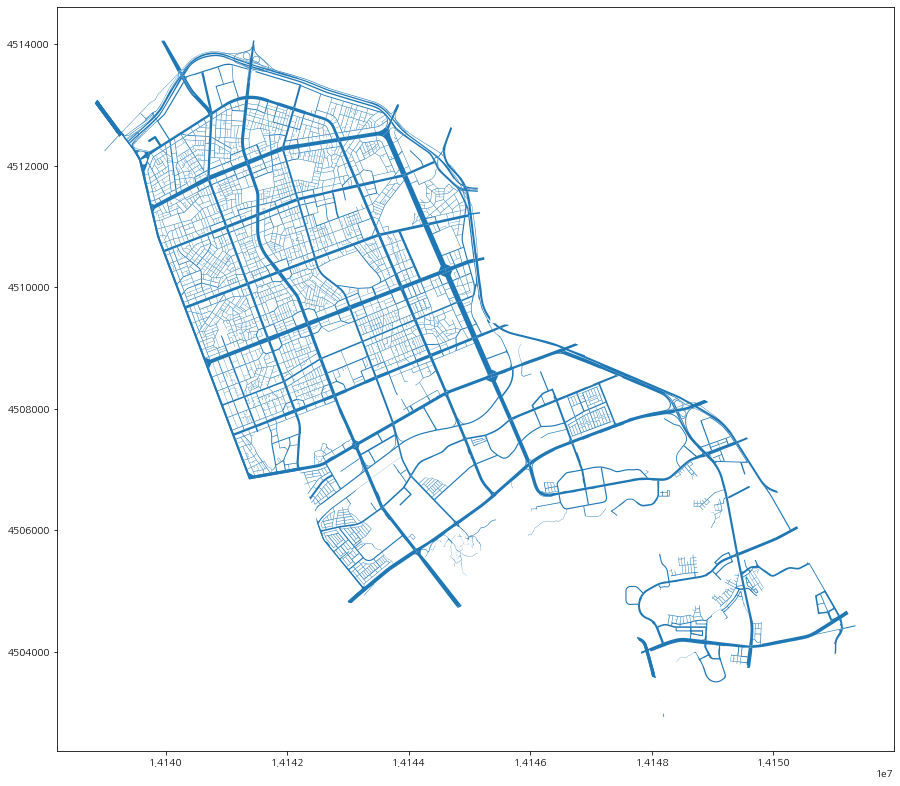

In [57]:
gdf_rd_gn.plot()

In [58]:
gdf_library4.head()

,name,gu,geometry
1433,세곡도서관,강남구,POINT (14149476.666 4504689.474)
1434,대치1작은도서관,강남구,POINT (14143895.486 4508083.707)
1435,역삼2동작은도서관,강남구,POINT (14142749.159 4508454.990)
1436,신사동작은도서관,강남구,POINT (14140113.094 4512395.879)
1437,압구정동작은도서관,강남구,POINT (14140297.559 4512790.410)


## 4. 공간분석 

공간 중첩을 위해 도서관, CCTV, 보안등 점 공간데이터를 지정 반경으로 버퍼하여 면 데이터로 만들겠습니다.

In [59]:
# 도서관, CCTV, 보안등 BUFFER
from shapely.geometry import Polygon
#from shapely.ops import cascaded_union

gdf_lib_buf = gpd.GeoDataFrame()
gdf_cctv_buf = gpd.GeoDataFrame()
gdf_slight3 = gpd.GeoDataFrame()
gdf_slight_buf = gpd.GeoDataFrame()

#도서관은 버퍼하면서 명칭 속성을 붙여주기
gdf_lib_buf['geometry'] = gdf_library4.buffer(500) #500m
gdf_lib_buf = gpd.GeoDataFrame(gdf_library4['name'], geometry=gdf_lib_buf.geometry, crs=from_epsg(3857))

gdf_cctv_buf['geometry'] = gdf_cctv3.buffer(50) #50m

gdf_slight3 = gdf_slight2[gdf_slight2.is_valid]  #도형 오류 제거 polygon = polygon.buffer(0)
gdf_slight_buf['geometry'] = gdf_slight3.buffer(20) 

In [60]:
gdf_lib_buf.head()

,name,geometry
1433,세곡도서관,"POLYGON ((14149976.666 4504689.474, 14149974.2..."
1434,대치1작은도서관,"POLYGON ((14144395.486 4508083.707, 14144393.0..."
1435,역삼2동작은도서관,"POLYGON ((14143249.159 4508454.990, 14143246.7..."
1436,신사동작은도서관,"POLYGON ((14140613.094 4512395.879, 14140610.6..."
1437,압구정동작은도서관,"POLYGON ((14140797.559 4512790.410, 14140795.1..."


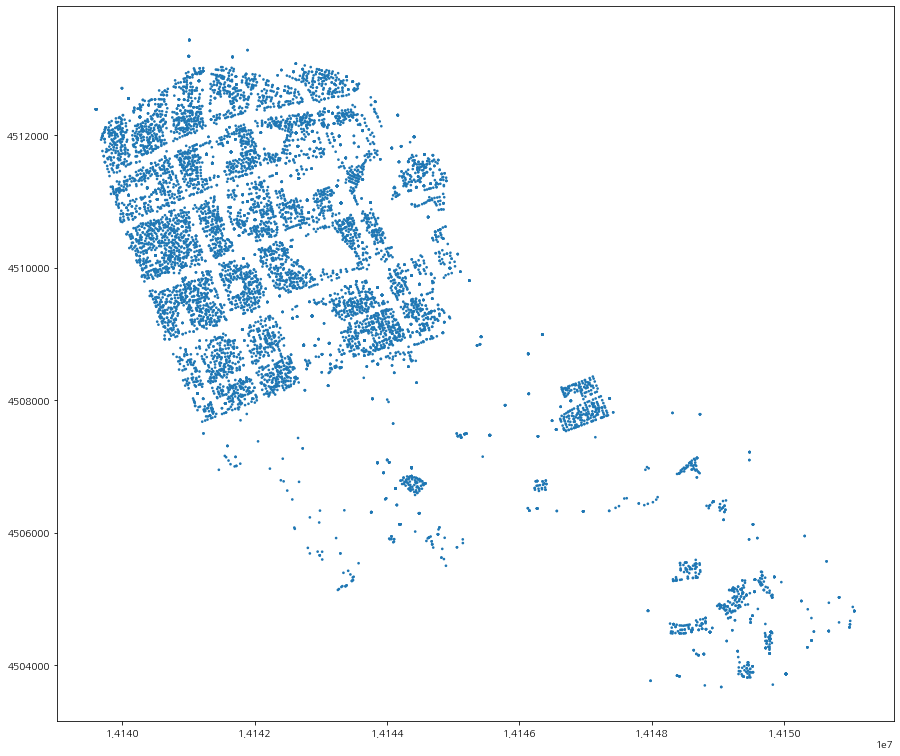

In [61]:
gdf_slight_buf.plot()

geopandas의 overlay 중 Intersection을 적용하여 서로 교차하는 영역만 추출해보겠습니다.

In [62]:
# 도서관 버퍼에서 실폭도로 부분만 공간 추출
gdf_lib_rd = gpd.overlay(gdf_lib_buf, gdf_rd_gn, how='intersection')
#gdf_lib_rd.plot()

In [63]:
gdf_lib_rd.head()

,name,DO,SIG_CD_1,SIG_KOR_NM,spop_ratio,crime_sum,crime_ratio,OPERT_DE,RW_SN,SIG_CD_2,geometry
0,세곡도서관,11,11680,강남구,17.2,7513,7.4,20191015143426,4534,11680,"POLYGON ((14149786.948 4504297.840, 14149773.9..."
1,세곡도서관,11,11680,강남구,17.2,7513,7.4,20080912,3,11680,"POLYGON ((14149698.719 4504242.059, 14149690.4..."
2,세곡도서관,11,11680,강남구,17.2,7513,7.4,20080912,1,11680,"POLYGON ((14149798.320 4504307.009, 14149793.8..."
3,세곡도서관,11,11680,강남구,17.2,7513,7.4,20191015143446,4535,11680,"POLYGON ((14149748.038 4504383.355, 14149797.4..."
4,세곡도서관,11,11680,강남구,17.2,7513,7.4,20191027142136,4548,11680,"POLYGON ((14149751.711 4504379.461, 14149751.6..."


교차하면서 쪼개진 면형 데이터들을 도서관 명칭으로 Dissolve 하겠습니다.

In [64]:
#도서관 버퍼는 명칭으로 디졸브
gdf_lib_rd2 = gdf_lib_rd.dissolve(by='name')
gdf_lib_rd2.reset_index(level=['name'], inplace = True) #name을 column으로
gdf_lib_rd2.info()
gdf_lib_rd2.head(2)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
name           24 non-null object
geometry       24 non-null geometry
DO             24 non-null object
SIG_CD_1       24 non-null object
SIG_KOR_NM     24 non-null object
spop_ratio     24 non-null float64
crime_sum      24 non-null int32
crime_ratio    24 non-null float64
OPERT_DE       18 non-null object
RW_SN          24 non-null int64
SIG_CD_2       24 non-null object
dtypes: float64(2), geometry(1), int32(1), int64(1), object(6)
memory usage: 2.1+ KB


,name,geometry,DO,SIG_CD_1,SIG_KOR_NM,spop_ratio,crime_sum,crime_ratio,OPERT_DE,RW_SN,SIG_CD_2
0,개포4동작은도서관,"MULTIPOLYGON (((14143249.734 4505566.534, 1414...",11,11680,강남구,17.2,7513,7.4,None,3131,11680
1,논현도서관,"MULTIPOLYGON (((14141773.092 4510959.771, 1414...",11,11680,강남구,17.2,7513,7.4,20080908,3488,11680


이번에는 union으로 CCTV와 보안등 버퍼를 하나의 공간데이터로 합치겠습니다.

In [65]:
# CCTV와 보안등 UNION
gdf_cclight = gpd.overlay(gdf_cctv_buf, gdf_slight_buf, how='union')
#gdf_cclight.plot()

이제 difference를 이용하여 도서관 주변 실폭도로에서 CCTV-보안등 버퍼 영역을 제외시켜보겠습니다.

In [66]:
# 도서관 주변 실폭도로에서 CCTV-보안등 버퍼 UNION를 제거
gdf_becareful = gpd.overlay(gdf_lib_rd2, gdf_cclight, how='difference')
#gdf_becareful.plot()

In [67]:
gdf_becareful.drop(['DO', 'SIG_CD_1', 'SIG_KOR_NM', 'spop_ratio', 'crime_sum', 'OPERT_DE', 'RW_SN', 'SIG_CD_2', 'crime_ratio'], axis=1, inplace=True) #불필요한 컬럼 삭제
gdf_becareful.info()
gdf_becareful.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 2 columns):
name        24 non-null object
geometry    24 non-null geometry
dtypes: geometry(1), object(1)
memory usage: 576.0+ bytes


,name,geometry
0,개포4동작은도서관,"MULTIPOLYGON (((14143518.872 4506360.488, 1414..."
1,논현도서관,"MULTIPOLYGON (((14141247.827 4511395.722, 1414..."
2,논현정보도서관,"MULTIPOLYGON (((14141330.373 4510882.348, 1414..."
3,대치1작은도서관,"MULTIPOLYGON (((14143819.391 4507832.098, 1414..."
4,대치도서관,"MULTIPOLYGON (((14145324.439 4508848.413, 1414..."


도형 면적이 넓을 수록 CCTV와 보안등이 적은 것으로 보고 이를 속성 컬럼에 넣어보겠습니다.

In [68]:
gdf_becareful['area'] = gdf_becareful['geometry'].area  #도형 면적
gdf_becareful.head()

,name,geometry,area
0,개포4동작은도서관,"MULTIPOLYGON (((14143518.872 4506360.488, 1414...",82540.350300
1,논현도서관,"MULTIPOLYGON (((14141247.827 4511395.722, 1414...",136204.683208
2,논현정보도서관,"MULTIPOLYGON (((14141330.373 4510882.348, 1414...",107900.380208
3,대치1작은도서관,"MULTIPOLYGON (((14143819.391 4507832.098, 1414...",58174.022332
4,대치도서관,"MULTIPOLYGON (((14145324.439 4508848.413, 1414...",125081.070969


In [69]:
gdf_becareful.crs = "epsg:3857"
gdf_becareful.crs

'epsg:3857'

## 5. 시각화

배경맵과 함께 표출할 때 공간데이터가 꽉 차게 표시하기 위해서 total_bounds 값을 필요로 할 수 있습니다.

In [70]:
gdf_becareful4326 = gdf_becareful.to_crs(epsg=4326)  #EPSG 4326 좌표계로 좌표 변환
gdf_becareful4326.reindex(['idx'])
minx, miny, maxx, maxy = gdf_becareful4326.geometry.total_bounds  #바운더리 좌표 받기
print( (minx + (maxx - minx))  ,  (miny + (maxy - miny)) )  #레이어 중심좌표 확인
print(minx, miny) 

127.10998111782676 37.530331667500334
127.01842500534462 37.46562700636925


In [6]:
import json
import rtree
import folium  #conda intall folium으로는 못찾고, pip install folium으로는 설치가 됩니다.

In [79]:
g_bcare_j = gdf_becareful4326.to_json()   #Folium에서 쓰기 위해 geojson으로 변환 
#나중에 다시 불러 쓰기 위해 파일로 저장
gdf_becareful4326.to_file("./data/python/gn_becareful.shp", encoding='EUC-KR')
gdf_becareful4326.to_file("./data/python/gdf_becareful4326.geojson", driver='GeoJSON')

In [9]:
gdf_becareful4326_2 = gpd.read_file('./data/python/gn_becareful.shp', encoding='EUC-KR')  
#euc-kr, euckr, utf-8, cp949 중 선택
gdf_becareful4326_2.head()

,name,area,geometry
0,개포4동작은도서관,82540.350300,"MULTIPOLYGON (((127.05339 37.48096, 127.05340 ..."
1,논현도서관,136204.683208,"MULTIPOLYGON (((127.03299 37.51685, 127.03296 ..."
2,논현정보도서관,107900.380208,"MULTIPOLYGON (((127.03373 37.51319, 127.03373 ..."
3,대치1작은도서관,58174.022332,"MULTIPOLYGON (((127.05609 37.49145, 127.05707 ..."
4,대치도서관,125081.070969,"MULTIPOLYGON (((127.06961 37.49870, 127.07032 ..."


도서관 버퍼 데이터에 위험 면적 속성을 붙이겠습니다.

In [82]:
gdf_lib_buf2 = pd.merge(gdf_lib_buf, gdf_becareful4326, how='inner', on='name')
gdf_lib_buf2.drop(['geometry_y'], axis=1, inplace=True) #불필요한 컬럼 삭제
gdf_lib_buf2.rename(columns={"geometry_x":"geometry"}, inplace = True) 
gdf_lib_buf2.head()

,name,geometry,area
0,세곡도서관,"POLYGON ((14149976.666 4504689.474, 14149974.2...",64543.824636
1,대치1작은도서관,"POLYGON ((14144395.486 4508083.707, 14144393.0...",58174.022332
2,역삼2동작은도서관,"POLYGON ((14143249.159 4508454.990, 14143246.7...",116024.011775
3,신사동작은도서관,"POLYGON ((14140613.094 4512395.879, 14140610.6...",90122.871814
4,압구정동작은도서관,"POLYGON ((14140797.559 4512790.410, 14140795.1...",128499.074173


In [99]:
gdf_lib_buf2.crs = "epsg:3857"
gdf_libb4326 = gdf_lib_buf2.to_crs(epsg=4326)  #강남구 도서관 버퍼를 EPSG 4326 좌표계로 좌표 변환
geo_libb4326 = gdf_libb4326.to_json()   # geojson으로 변환 
#나중에 다시 불러 쓰기 위해 파일로 저장
gdf_libb4326.to_file("./data/python/gdf_libb4326.shp", encoding='EUC-KR')
gdf_libb4326.to_file("./data/python/geo_libb4326.geojson", driver='GeoJSON')

In [4]:
gdf_libb4326 = gpd.read_file('./data/python/gdf_libb4326.shp', encoding='EUC-KR')  
#euc-kr, euckr, utf-8, cp949 중 선택
gdf_libb4326.head()

,name,area,geometry
0,세곡도서관,64543.824636,"POLYGON ((127.11140 37.46905, 127.11138 37.468..."
1,대치1작은도서관,58174.022332,"POLYGON ((127.06127 37.49325, 127.06124 37.492..."
2,역삼2동작은도서관,116024.011775,"POLYGON ((127.05097 37.49589, 127.05095 37.495..."
3,신사동작은도서관,90122.871814,"POLYGON ((127.02729 37.52397, 127.02727 37.523..."
4,압구정동작은도서관,128499.074173,"POLYGON ((127.02895 37.52679, 127.02892 37.526..."


geoplot의 choropleth를 이용하여 배경맵에 단계구분도를 표시해보겠습니다.

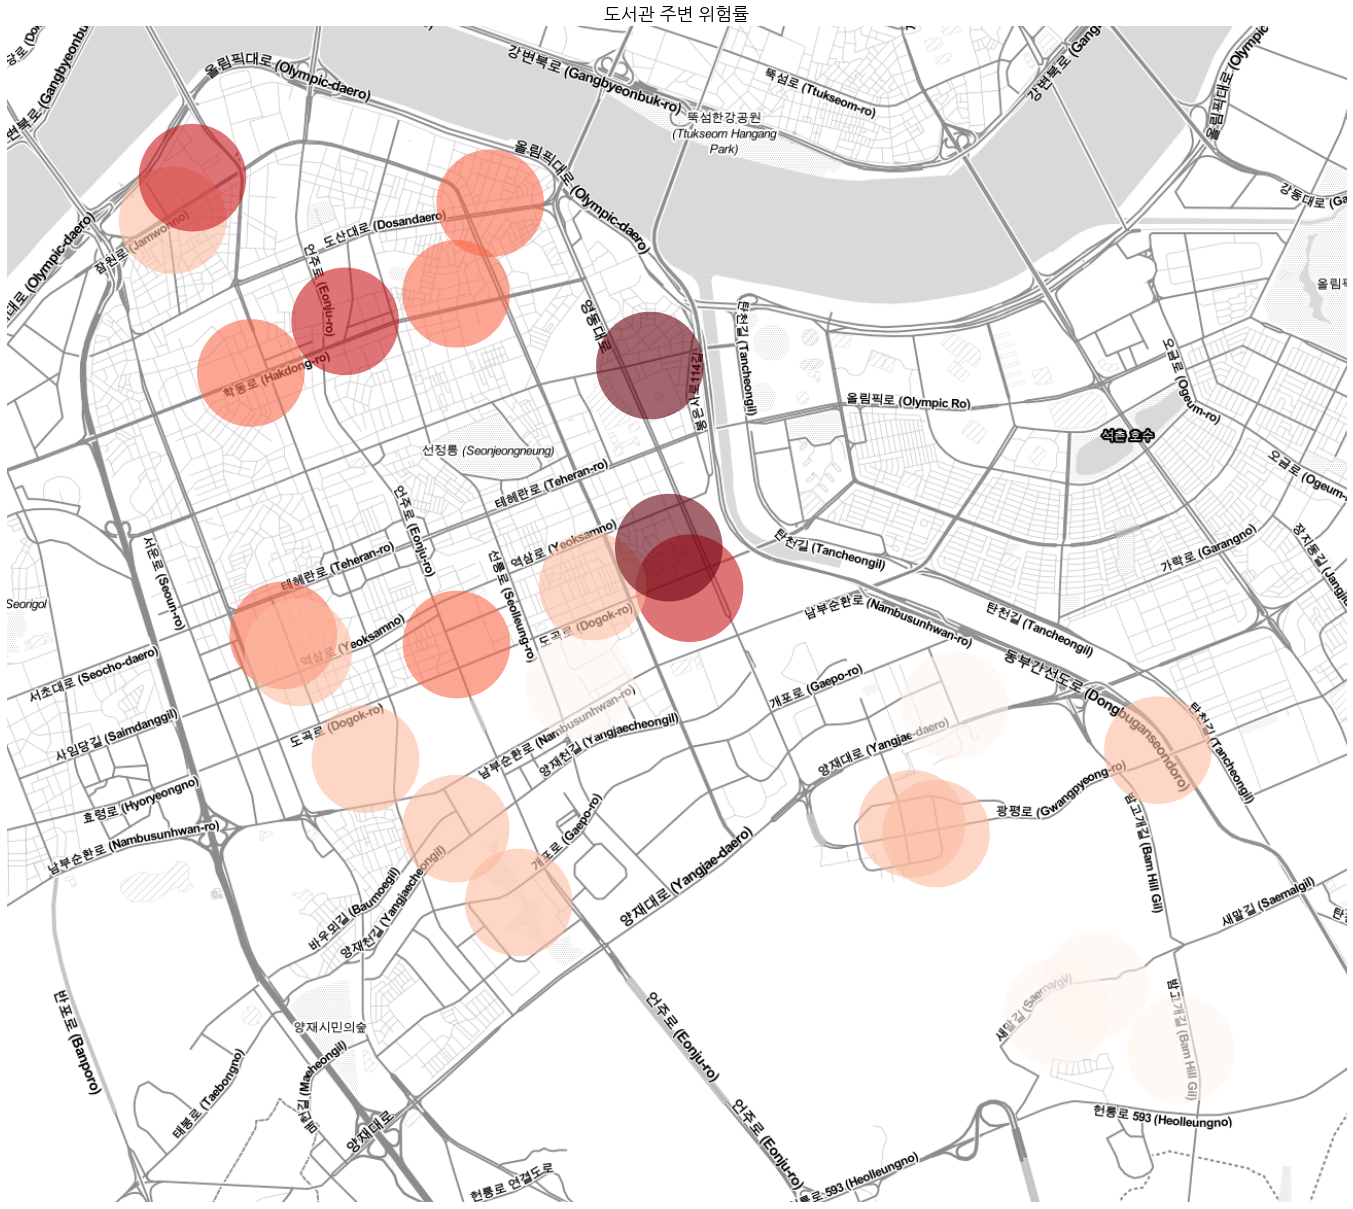

In [13]:
#scheme = mc.Quantiles(gdf_libb4326['area'], k=5)
extent = gdf_libb4326.total_bounds

ax = gplt.webmap(gdf_becareful4326_2, projection=gcrs.WebMercator(),
                provider='ST_TONER_LITE', figsize=(24, 24))
gplt.choropleth(gdf_libb4326, ax=ax, hue='area', cmap='Reds',
               projection=gcrs.WebMercator(), scheme='FisherJenks', alpha=0.6)

plt.title('도서관 주변 주의율', fontsize=18)
fig = plt.gcf()
plt.savefig('도서관 주변 주의율') #이미지 파일로 저장

이번엔 Folium을 이용해서 시각화해보겠습니다.

In [145]:
bins = list(gdf_libb4326['area'].quantile([0, 0.25, 0.5, 0.75, 1]))

map = folium.Map(location=[37.500, 127.049], zoom_start=12, tiles='CartoDB positron')
                 #, width=500,height=600)  #CartoDB positron  #Stamen Toner

map.choropleth(geo_data = geo_libb4326,  #g_bcare_j
               name='choropleth',
               data = gdf_libb4326,
               columns = ['name', 'area'],
               key_on = 'feature.properties.name',  
               fill_color = 'Reds', #PuRd 
               fill_opacity=0.7, line_opacity=0.2, 
               legend_name='도서관 주변 주의률',
               bins=bins, reset=True ) 

map